# This is notebook for CodeSignal practice tests

In [27]:
import numpy as np

# Rotate Matrix

You are given an n x n 2D matrix that represents an image. Rotate the image by 90 degrees (clockwise).


In [32]:
def rotateImage(a):
    n = len(a)
    m1 = n//2
    m2 = m1 + n % 2
    
    for i in range(m2):
        for j in range(m1):
            tem = a[i][j]
            a[i][j] = a[n-1-j][i]
            a[n-1-j][i] = a[n-1-i][n-1-j]
            a[n-1-i][n-1-j] = a[j][n-1-i]
            a[j][n-1-i] = tem
            
    return a

In [29]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
print(np.matrix(a))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


the output should be
rotateImage(a) = 

In [33]:
r = rotateImage(a)
print(np.matrix(r))

[[7 4 1]
 [8 5 2]
 [9 6 3]]


In [7]:
a = "."
int(a)

ValueError: invalid literal for int() with base 10: '.'

# First Duplicate

Given an array a that contains only numbers in the range from *1* to *a.length*, find the first duplicate **number** for which the second occurrence has the minimal index. In other words, if there are more than 1 duplicated numbers, return the **number** for which the second occurrence has a smaller index than the second occurrence of the other number does. If there are no such elements, return *-1*.

In [34]:
def firstDuplicate(a):

    res = -1
    maxa = max(a) + 1
    count = [0]*maxa
    
    for n in a: 
        count[n] += 1
        if count[n] == 2:
            res = n
            break    

    return res

In [35]:
a = [2, 1, 3, 5, 3, 2]
r = firstDuplicate(a)
print(r)

3


# First non repeating character

Given a string *s* consisting of small English letters, find and return the first instance of a non-repeating character in it. If there is no such character, return *'_'*.

In [36]:
def firstNotRepeatingCharacter(s):
    
    a = 'abcdefghijklmnoqrstuvwxyz'
    ch = [c for c in a] # make a list of the alphabet
    l = len(a) # for sure length a = 26
    
    count = [0]*l # initiate counting
    loc = [0]*l # initiate locations
    
    res = '_' # default result if nothing happens
    
    ls = len(s)
    
    for n in range(ls):
        c = s[n]
        for m in range(l): 
            if c == ch[m]: 
                count[m] += 1
                loc[m] = n
                break
                
    minl = ls
    
    for n in range(l):
        if count[n] == 1:
            if minl > loc[n]: 
                minl = loc[n]
                res = ch[n]
                
    return res
    
    

In [38]:
s = "abacabad"
fc = firstNotRepeatingCharacter(s)
print(fc)

c


# Compose ranges

Given a sorted integer array that does not contain any duplicates, return a summary of the number ranges it contains.

In [43]:
def composeRanges(nums):
    
    length = len(nums)
    if length == 0:
        return []
    
    elif length == 1:
        return [str(nums[0])]
    
    else:
        res=[]
        a = nums[0]
        b = a
        for n in range(1,length): 
            c = nums[n]
            if c < b + 2:
                if n < length - 1:
                    b = c
                    pass
                else:
                    s = str(a) + "->" + str(c)
            
                    res.append(s)
            else:
                s = str(a)
                if b > a:
                    s = s + "->" + str(b)
                res.append(s)
                a = c
                b = c 
                if n == length - 1:
                    res.append(str(c))
                    
        return res
                    
                    

In [44]:
nums = [-1, 0, 1, 2, 6, 7, 9]
r = composeRanges(nums)
print(r)

['-1->2', '6->7', '9']


# House robber

You are planning to rob houses on a specific street, and you know that every house on the street has a certain amount of money hidden. The only thing stopping you from robbing all of them in one night is that adjacent houses on the street have a connected security system. The system will automatically trigger an alarm if two adjacent houses are broken into on the same night.

Given a list of non-negative integers *nums* representing the amount of money hidden in each house, determine the maximum amount of money you can rob in one night without triggering an alarm.

In [45]:
def houseRobber(nums):
    length = len(nums)
    if length <=1:
        return sum(nums)
    elif length == 2:
        return max(nums)
    elif length == 3:
        return max(nums[0] + nums[2], nums[1])
    elif length > 3:
        a = nums[0]
        b = max(a,nums[1])
        c = max(nums[0] + nums[2], nums[1])
        
        for n in range(3,length):
            d = max(nums[n] + b, nums[n-1] + a)
            a = b
            b = c
            c = d
            
        return max(b, c)
        

In [46]:
nums = [232, 161, 89, 177, 117, 212, 126, 247, 155, 197, 88, 217, 81, 207]
r = houseRobber(nums)
print(r)

1489


# Climb stairs

You are climbing a staircase that has *n* steps. You can take the steps either 1 or 2 at a time. Calculate how many distinct ways you can climb to the top of the staircase.

In [47]:
def climbingStairs(n):
    if n == 1:
        return 1
    
    elif n == 2: 
        return 2

    else:
        a = 1
        b = 2
        for i in range(n-2):
            c = b
            b = a + b
            a = c 
        return b
    
n = 20
print(climbingStairs(n))

10946


# Sudoku

*Sudoku* is a number-placement puzzle. The objective is to fill a *9 × 9* grid with numbers in such a way that each column, each row, and each of the nine *3 × 3* sub-grids that compose the grid all contain all of the numbers from *1  to 9* one time.

Implement an algorithm that will check whether the given grid of numbers represents a valid *Sudoku* puzzle according to the layout rules described above. Note that the puzzle represented by grid does not have to be solvable.

In [26]:
def sudoku2(grid):
#   scenarios that make result False:
#   grid[i][j1] = grid[i][j2]  
#   grid[i1][j] = grid[i2][j]
#   grid[i1][j1] = grid[i2][j2] with |i1-i2|<3 and |j1-j2|<3
    
    res = True
    
    nums = []
    iloc = []
    jloc = []
    
    for i in range(9):   
        for j in range(9):
            n = grid[i][j]
            try:
                n = int(n)
                        
            except ValueError: 
                continue
            
            nums.append(n)
            iloc.append(i+1)
            jloc.append(j+1)

    for n in range(len(nums) - 1):
        n1 = nums[n]
        i1 = iloc[n]
        j1 = jloc[n]
        
        if res == False:
            break
            
        for m in range(n+1,len(nums)):
            n2 = nums[m]
            i2 = iloc[m]
            j2 = jloc[m]
            
            if n1 == n2:
                if i1 == i2 or j1 == j2:
                    res = False
                    print(n1,i1,j1)
                    print(n1,i2,j2)
                    break
                    
                if (i1 - 1) // 3 == (i2 - 1) // 3 and (j1 - 1) // 3 == (j2 - 1) // 3:
                    res = False
                    print(n1,i1,j1)
                    print(n1,i2,j2)
                    break
                    

    return res
                      

In [27]:
grid = [[".","9",".",".","4",".",".",".","."], 
 ["1",".",".",".",".",".","6",".","."], 
 [".",".","3",".",".",".",".",".","."], 
 [".",".",".",".",".",".",".",".","."], 
 [".",".",".","7",".",".",".",".","."], 
 ["3",".",".",".","5",".",".",".","."], 
 [".",".","7",".",".","4",".",".","."], 
 [".",".",".",".",".",".",".",".","."], 
 [".",".",".",".","7",".",".",".","."]]

sudoku2(grid)

True

# Optimal flight routes

Max operating distance of airplane = maxd

List of forward routes = forr. First index for route number, second for distance.

List of return routes = retr. First index for route number, second for distance.

Find the list of pairs of routes that are optimal: distance route 1 + route 2 <= maxd


In [102]:
def opti(maxd,forr,retr):
    
    l1 = len(forr)
    l2 = len(retr)
    dop = 0
    check = 0
    for r1 in forr:
        i = r1[0]
        d1 = r1[1]
        for r2 in retr:
            j = r2[0]
            d2=r2[1]
            
            if d1+d2==maxd:
                if check == 0:
                    r = [[i,j]]
                else:
                    r = r+[[i,j]]
                    check = 1
            elif d1+d2>dop and d1+d2<maxd:
                dop = d1+d2
    if check == 0 and dop > 0:
        for r1 in forr:
            i = r1[0]
            d1 = r1[1] 
            for r2 in retr:
                j = r2[0]
                d2=r2[1]
                
                if d1+d2==dop:
                    r = r+ [[i,j]]
    return r

In [79]:
maxd = 20
forr = [[1,8],[2,15],[3,9]]
retr = [[1,8],[2,11],[3,12]]

opti(maxd,forr,retr)

[[3, 2], [1, 2]]

# Decoding signal

A top secret message containing uppercase letters from 'A' to 'Z' has been encoded as numbers using the following mapping:

'A' -> 1
'B' -> 2
...
'Z' -> 26

You are an FBI agent and you need to determine the total number of ways that the message can be decoded.

Since the answer could be very large, take it modulo $10^{9}$ + 7

Example

For message = "123", the output should be
mapDecoding(message) = 3.

"123" can be decoded as "ABC" (1 2 3), "LC" (12 3) or "AW" (1 23), so the total number of ways is 3.

Clues:

The digit '0' is special:

Any message that starts with the digit '0' is automatically invalid. Note that not all message strings are guaranteed to encode valid messages. (See test 6 - message = '301' has zero valid decodings.)
Treat the numbers '10' and '20' carefully. They are valid two digit numbers, but cannot be split because of the trailing zeros.
If the digit sequences '00', '30', '40', '50', ...,'90' ever show up, there are no valid decodings of the string, because these aren't valid two digit numbers for our decoding, and they cannot be split.
The base cases can be tricky.

If message has length 0, there is one valid decoding - the empty message.
If message has length 1, then the message has one valid decoding unless message == '0', in which case there are no valid decodings.
If message has length 2, there might be zero valid decodings, one valid decoding, or two valid decodings.
Build up an array of partial solutions partial[i]. Use the base cases to determine how many valid decodings of just the last two characters there are, so partial[0] stores the number of decodings of just the last character, partial[1] stores the number of valid decodings of the last two characters, etc. Keep track of the ith character, and the (i-1)th character from the end of the string, and use partial[i-1] and partial[i-2] to determine the partial[i+1]. If the pair of numbers can be interpreted as either two one-digit numbers or a single two-digit number, then partial[i] = partial[i-1] + partial[i-2]. The tricky part will be determining if you are allowed to split the characters. Once you are done, return the last element in partial.

In [3]:
def mapDecoding(message):
    # a number can be decompsed if <= 26
    # if length = length of message
    # if message[length - 1] < 7 and message[length - 2] < 3:
    # s(length) = s(length - 1) + s(length - 2)
    # else:
    # s(length) = s(length - 1)
    # 
    
    length = len(message)
    
    if length == 0:
        return 1
    elif length == 1:
        if message[0] == '0':
            return 0
        else:
            return 1
        
    else:
        s_2 = 0
        s_1 = 1
        n_1 = 3
        s = 1
        for c in message:
            n = int(c)
            if n == 0:
                if n_1 > 2 or n_1 == 0:
                    s = 0
                    break
                else:
                    s = s_2 % (10 ** 9 + 7)
                    s_2 = s_1
                    s_1 = s
            else:
                if n_1 == 1 or (n_1 == 2 and n < 7):
                    s = s_2 + s_1
                s = s % (10 ** 9 + 7)
                s_2 = s_1
                s_1 = s
                
                    
            n_1 = n
            
            print('for', c, 'count = ', s)
        
            
        return s % (10 ** 9 + 7)


In [4]:
message = "111611612192111241"
mapDecoding(message)

for 1 count =  1
for 1 count =  2
for 1 count =  3
for 6 count =  5
for 1 count =  5
for 1 count =  10
for 6 count =  15
for 1 count =  15
for 2 count =  30
for 1 count =  45
for 9 count =  75
for 2 count =  75
for 1 count =  150
for 1 count =  225
for 1 count =  375
for 2 count =  600
for 4 count =  975
for 1 count =  975


975

In [44]:
def mapDecoding_by_k_lee(msg):
    a, b = 1, 0
    M = 10 ** 9 + 7
    for i in range(len(msg)-1, -1, -1):
        if msg[i] == "0":
            a, b = 0, a
        else:
            a, b = (a + (i+2 <= len(msg) and msg[i:i+2] <= "26") * b) % M, a
    return a

In [46]:
def mapDecoding_by_gerardold(message):
    prev = count = 0
    curr = 1
    
    for i in range(len(message)):
        digit = ord(message[i]) - 48
        number = 0
        if i > 0:
            number = (ord(message[i - 1]) - 48) * 10 + digit
        if digit > 0: count = curr
        if number <= 26 and number > 9: count += prev
        prev = curr
        curr = count % 1000000007
        count = 0
    return curr

In [53]:
def mapDecoding_by_nivekium(message):
     if len(message) == 0:
          return 1
     d = [0] * (len(message)+1)    
     d[0] = 1
     for i in range(len(message)):     
          r = 0
          if int(message[-i-1]) in range(1,10):
               r += d[i]
               
          if i > 0 and int(message[-i-1:][0:2]) in range(10,27):
               r += d[i-1]          
          d[i+1] = r #% (10**9+7)
          print(i+1,message[i],d[i+1])
     return d[len(message)]

In [55]:
message = '1221112111122221211221221212212212111221222212122221222112122212121212221212122221211112212212211211'
print(len(message))
# for c in message[1:]:
#     print(c)
mapDecoding(message)
#mapDecoding_by_k_lee(message)
#mapDecoding_by_nivekium(message)

100


573147844013817084101

## Filling blocks

You have a block with the dimensions 4 × n. Find the number of different ways you can fill this block with smaller blocks that have the dimensions 1 × 2. You are allowed to rotate the smaller blocks.

EXAMPLE

* For n = 1, the output should be
fillingBlocks(n) = 1.

There is only one possible way to arrange the smaller 1 × 2 blocks inside the 4 × 1 block.

* For n = 4, the output should be
fillingBlocks(n) = 36.

Here are the 36 possible configuration of smaller blocks inside the 4 × 4 block:

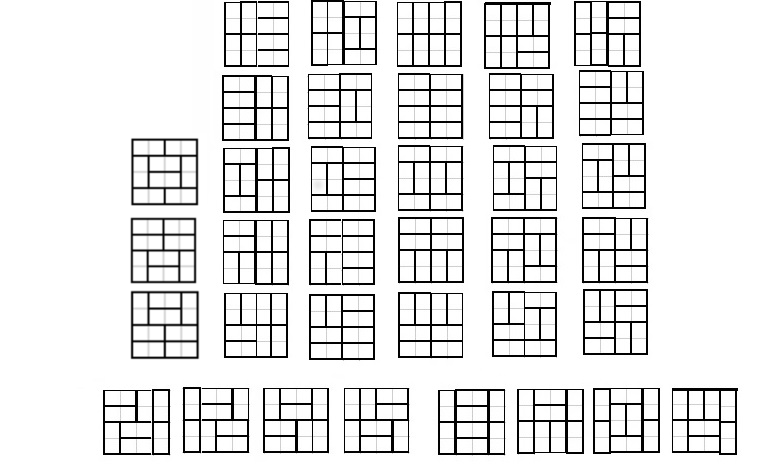

In [74]:
from IPython.display import Image
Image('fillingBlock.png', width=400, height=400)

In [71]:
def fillingBlocks(n):
    
#     the key is to find the number of arrangement that cannot be further divided
#     for 4 x 1, of course there is only ind[1] = 1 indivisible arrangement
#     for 4 x 2, there are 5 arrangement, ind[2] = 4 of them are indivisible
#     for 4 x j with j > 2:
#         there are ind[j] = 2 indivisibles if j is odd
#         there are ind[j] = 3 indivisibles if j is even
#     s[n] = sum(ind[i]*s[i]) for i from 1 to n
#     note that s[0] = 1
        
    s = [0]*(n+3)
    s[0] = 1
    s[1] = 1
    s[2] = 5
    if n > 2:
        for i in range(3,n+1):
            s[i] = s[i - 1] + 4 * s[i - 2]
            for j in range(3,i+1):
                s[i] += s[i - j] * (3 - j % 2)
                
    return s[n]

In [72]:
fillingBlocks(6)

281

## Maximal square

You have a 2D binary matrix that's filled with 0s and 1s. In the matrix, find the largest square that contains only 1s and return its area.

Example

For



In [38]:
matrix = [
    ['1', '0', '1', '1', '1'], 
    ['1', '0', '1', '1', '1'],
    ['1', '1', '1', '1', '1'],    
    ['1', '0', '0', '1', '0'],
    ['1', '0', '0', '1', '0']   
]

the output should be
maximalSquare(matrix) = 9.

In [75]:
matrix = [['1']]

In [80]:
def maximalsquare(matrix):
    
    import numpy as np
    
    matrix = [[int(c) for c in row] for row in matrix]
    
    arr = np.matrix(matrix)
    
    nrow, ncol = arr.shape
    print(nrow,ncol)
    #print(arr[0:2,0:4])
    #print(arr.sum())
    
    size = 0
    
    for n in range(nrow):
        for m in range(ncol):
            lmax = min(nrow-n, ncol-m)
            if size < lmax:
                smax = size
                for l in range(size,lmax):
                    sub = arr[n:n+l+1,m:m+l+1]
                    s = sub.sum()
                    if s == (l+1)*(l+1):
                        if l+1 > smax:
                            smax = l + 1
                    else:
                        break
                        
                size = smax
    
    return size*size
                
    

In [81]:
# matrix = [[int(c) for c in row] for row in matrix]
# print(sum(map(sum,matrix)))
# subm = matrix[1:2,2:3]

maximalsquare(matrix)

1 1


1

# Buble Sort

This is from the MIT python course

In [106]:
def bubble_sort(L):
    swap = False
    while not swap:
        print('bubble sort: ' + str(L))
        swap = True
        for j in range(1, len(L)):
            if L[j-1] > L[j]:
                swap = False
                temp = L[j]
                L[j] = L[j-1]
                L[j-1] = temp

In [108]:
testList = [1,3,5,7,2,6,25,18,13]

print('')
bubble_sort(testList)
print(testList)


bubble sort: [1, 3, 5, 7, 2, 6, 25, 18, 13]
bubble sort: [1, 3, 5, 2, 6, 7, 18, 13, 25]
bubble sort: [1, 3, 2, 5, 6, 7, 13, 18, 25]
bubble sort: [1, 2, 3, 5, 6, 7, 13, 18, 25]
[1, 2, 3, 5, 6, 7, 13, 18, 25]


## Random tests
to test random things

In [144]:
import string
from datetime import datetime

t = "3 Oct 2016 17:00:10"
a = datetime.strptime(t,"%d %b %Y %H:%M:%S")
print(a)
print(type(a))
print(a.month)

b = datetime(2087, 10, 15)
print(b)

print(True or False and True)

2016-10-03 17:00:10
<class 'datetime.datetime'>
10
2087-10-15 00:00:00
True


In [146]:
a = []
a += ['d']
print(a)

['d']
